In [23]:
# limit compare with and without two tag expected limit
import ROOT as rt
# import root_numpy as rtnp
import csv
import re
import sys
import collections
import os
from collections import OrderedDict
import uproot
import pandas as pd

import scipy
import awkward
import numpy as np
import time
import numba
from numba import jit
from matplotlib import pyplot as plt
sys.path.append('/storage/af/user/christiw/gpu/christiw/llp/delayed_jet_analyzer/lib/')
from histo_utilities import create_TH1D, create_TH2D, std_color_list, create_TGraph, make_ratio_plot

import CMS_lumi, tdrstyle
tdrstyle.setTDRStyle()



# donotdelete = []
print(sys.version)

3.6.8 (default, Aug  7 2019, 17:28:10) 
[GCC 4.8.5 20150623 (Red Hat 4.8.5-39)]


# Load ntuples

In [24]:
limitTrees =OrderedDict()
dataCards = OrderedDict()

dataCards_removeOverlap =OrderedDict()
limitTrees_removeOverlap = OrderedDict()

version = '/V1p17/v2/v146/'
dc_version = 'v2'

mode = 'allProd_withggZH'
# decay = '4Tau'
# decay = 'dddd'
decay = 'bbbb'



category = '/csc/'
limitDir = '/storage/af/user/christiw/login-1/christiw/LLP/CMSSW_10_2_13/src/HiggsAnalysis/MuonSystemLimit/combine/limitTrees_2tag/'+version+'/'+dc_version+'/'
dataCardDir = '/storage/af/user/christiw/login-1/christiw/LLP/CMSSW_10_2_13/src/HiggsAnalysis/MuonSystemLimit/combine/datacards_2tag/'+version+'/'+dc_version+'/'
hybridNewDir = '/storage/af/user/christiw/login-1/christiw/LLP/CMSSW_10_2_13/src/HiggsAnalysis/MuonSystemLimit/combine/hybridNew/'+version+'/'+dc_version+'/'


lumi = 137000

ctaus = np.array([10, 20, 30, 40, 100, 200, 300, 500, 1000, 2000, 3000, 4000, 5000, 10000, 20000, 30000, 100000,int(2e5),int(3e5),\
                        int(2e6),int(3e6),int(5e6),int(1e7)]) #v12
ctaus = np.array([ 30, 100, 300, 1000, 3000,  10000, 30000, 100000,])



if decay == 'bbbb': mass = np.array([ 15, 40, 55])
else:mass = np.array([ 7, 15, 40, 55])

### limit branch: 2.5, 16.0, 50.0, 84.0, 97.5, obs
expected = ['0.025', '0.160','0.500','0.840','0.975']
dphi = 'dPhiCluster0p75'

for m in mass:
    limitTrees[m] = {}
    dataCards[m] = {}
    dataCards_removeOverlap[m] = {}
    limitTrees_removeOverlap[m] = {}
    for ct in ctaus:
        name = mode+'_HToSSTo'+decay
        
        # combine 2tag with CSC
#         category = '/csc/'
#         unblind = 'unblind'

#         nrechit = 130
#         dataCards[m][ct] = dataCardDir + '/'+unblind+category+name+'_mh125_mx'+str(m)+'_ctau'+str(ct)+'mm_nRechit'+ str(nrechit)+dphi+'.txt'
#         limitTrees[m][ct] = limitDir + '/'+unblind+category+'/obs/higgsCombine.'+name+'_mh125_mx'+str(m)+'_ctau'+str(ct)+'mm_nRechit'+ str(nrechit)+dphi+'.AsymptoticLimits.mH120.root'
        
#         category = '/csc_twotag/'
#         unblind = 'blind'
#         nrechit = 100

#         dataCards_removeOverlap[m][ct] = dataCardDir + '/'+unblind+category+name+'_mh125_mx'+str(m)+'_ctau'+str(ct)+'mm_nRechit'+ str(nrechit)+'.txt'
#         limitTrees_removeOverlap[m][ct] = limitDir + '/'+unblind+category+'/higgsCombine.'+name+'_mh125_mx'+str(m)+'_ctau'+str(ct)+'mm_nRechit'+ str(nrechit)+'.AsymptoticLimits.mH120.root'

        # combine 2tag with CSC+DT
        category = '/csc_dt/'
        unblind = 'blind'
        dc_version = 'v1'
        limitDir = '/storage/af/user/christiw/login-1/christiw/LLP/CMSSW_10_2_13/src/HiggsAnalysis/MuonSystemLimit/combine/limitTrees_2tag/'+version+'/'+dc_version+'/'
        dataCardDir = '/storage/af/user/christiw/login-1/christiw/LLP/CMSSW_10_2_13/src/HiggsAnalysis/MuonSystemLimit/combine/datacards_2tag/'+version+'/'+dc_version+'/'
        hybridNewDir = '/storage/af/user/christiw/login-1/christiw/LLP/CMSSW_10_2_13/src/HiggsAnalysis/MuonSystemLimit/combine/hybridNew/'+version+'/'+dc_version+'/'
        dataCards[m][ct] = dataCardDir + '/'+unblind+category+name+'_mh125_mx'+str(m)+'_ctau'+str(ct)+'mm_comb.txt'
#         print(dataCards[m][ct])
        limitTrees[m][ct] = limitDir + '/'+unblind+category+'/higgsCombine_'+name+'_mh125_mx'+str(m)+'_ctau'+str(ct)+'mm_comb.AsymptoticLimits.mH120.root'

        category = '/csc_removeOverlap_dt_two_tag/'
        unblind = 'blind'
        dc_version = 'v2'
        limitDir = '/storage/af/user/christiw/login-1/christiw/LLP/CMSSW_10_2_13/src/HiggsAnalysis/MuonSystemLimit/combine/limitTrees_2tag/'+version+'/'+dc_version+'/'
        dataCardDir = '/storage/af/user/christiw/login-1/christiw/LLP/CMSSW_10_2_13/src/HiggsAnalysis/MuonSystemLimit/combine/datacards_2tag/'+version+'/'+dc_version+'/'
        hybridNewDir = '/storage/af/user/christiw/login-1/christiw/LLP/CMSSW_10_2_13/src/HiggsAnalysis/MuonSystemLimit/combine/hybridNew/'+version+'/'+dc_version+'/'
        dataCards_removeOverlap[m][ct] = dataCardDir + '/'+unblind+category+name+'_mh125_mx'+str(m)+'_ctau'+str(ct)+'mm_nCsc100_nDt80.txt'
        limitTrees_removeOverlap[m][ct] = limitDir + '/'+unblind+category+'/higgsCombine.'+name+'_mh125_mx'+str(m)+'_ctau'+str(ct)+'mm_nCsc100_nDt80.AsymptoticLimits.mH120.root'

        
        
norms = []
limits = {}
limits_removeOverlap = {}
for i,m in enumerate(limitTrees.keys()):
    limits[m] = np.ones((len(ctaus), 6))*1000000
    for j, k in enumerate(limitTrees[m].keys()):
        if not os.path.isfile(dataCards[m][k]):continue
        if not os.path.isfile(limitTrees[m][k]):continue

        line = open(dataCards[m][k], "r").readline()
        signal_norm = float(line.split(" ")[3])
        if signal_norm == 0:continue
        if len(uproot.open(limitTrees[m][k]).keys()) == 2:
            T = uproot.open(limitTrees[m][k])['limit']
            if len(np.array(T.array('limit'))) == 6:limits[m][j] = np.array(T.array('limit'))/signal_norm
    limits[m] = np.array(limits[m])
    
for i,m in enumerate(limitTrees_removeOverlap.keys()):
    limits_removeOverlap[m] = np.ones((len(ctaus), 5))*1000000
    for j, k in enumerate(limitTrees_removeOverlap[m].keys()):
        if not os.path.isfile(dataCards_removeOverlap[m][k]):continue
        if not os.path.isfile(limitTrees_removeOverlap[m][k]):continue
        line = open(dataCards_removeOverlap[m][k], "r").readline()
        if not line.split(" ")[0] == '#' :continue
        signal_norm = float(line.split(" ")[3])
        if signal_norm == 0:continue
        if len(uproot.open(limitTrees_removeOverlap[m][k]).keys()) == 2:
            T = uproot.open(limitTrees_removeOverlap[m][k])['limit']
            if len(np.array(T.array('limit'))) == 5:limits_removeOverlap[m][j] = np.array(T.array('limit'))/signal_norm
    limits_removeOverlap[m] = np.array(limits_removeOverlap[m])    

print(ctaus)



[    30    100    300   1000   3000  10000  30000 100000]


In [25]:
file_dir = '/storage/af/user/christiw/login-1/christiw/LLP/CMSSW_10_2_13/src/HiggsAnalysis/MuonSystemLimit/data/limits_others/'
file = {}



file['15'] = file_dir + 'atlas_2tag_15.csv'

file['35'] = file_dir + 'atlas_2tag_35.csv'

file['5'] = file_dir + 'atlas_2tag_5.csv'

file['5'] = file_dir + 'atlas_2tag_55.csv'


other_limits = {}
for k, v in file.items():
    other_limits[k] = np.genfromtxt(v, delimiter=',')
    
    other_limits[k] = other_limits[k][other_limits[k][:,0].argsort()]

# comparison of expected limit

[3.e-02 1.e-01 3.e-01 1.e+00 3.e+00 1.e+01 3.e+01 1.e+02]
15 [3.e-02 1.e-01 3.e-01 1.e+00 3.e+00 1.e+01 3.e+01 1.e+02] [0.89030897 0.87396288 0.55852439 0.59601219 0.78804409 0.92722093
 0.9770354  0.98109326]
15 [3.e-02 1.e-01 3.e-01 1.e+00 3.e+00 1.e+01 3.e+01 1.e+02] [0.1497977  0.00349797 0.00071249 0.00057482 0.00121903 0.00342277
 0.00887541 0.03269172]
40 [3.e-02 1.e-01 3.e-01 1.e+00 3.e+00 1.e+01 3.e+01 1.e+02] [0.89223111 0.82401816 0.48796062 0.59825816 0.81966901 0.92185536
 0.96516746]
40 [3.e-02 1.e-01 3.e-01 1.e+00 3.e+00 1.e+01 3.e+01 1.e+02] [0.16775956 0.00484835 0.00069062 0.00055265 0.00108257 0.00288353
 0.0089537 ]
55 [3.e-02 1.e-01 3.e-01 1.e+00 3.e+00 1.e+01 3.e+01 1.e+02] [0.83150116 0.69249447 0.79744389 0.90640282 0.94688419 0.95751261]
55 [3.e-02 1.e-01 3.e-01 1.e+00 3.e+00 1.e+01 3.e+01 1.e+02] [0.07439914 0.00256673 0.00077461 0.00094363 0.00219199 0.00619955]
137 fb^{-1} (13 TeV)


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


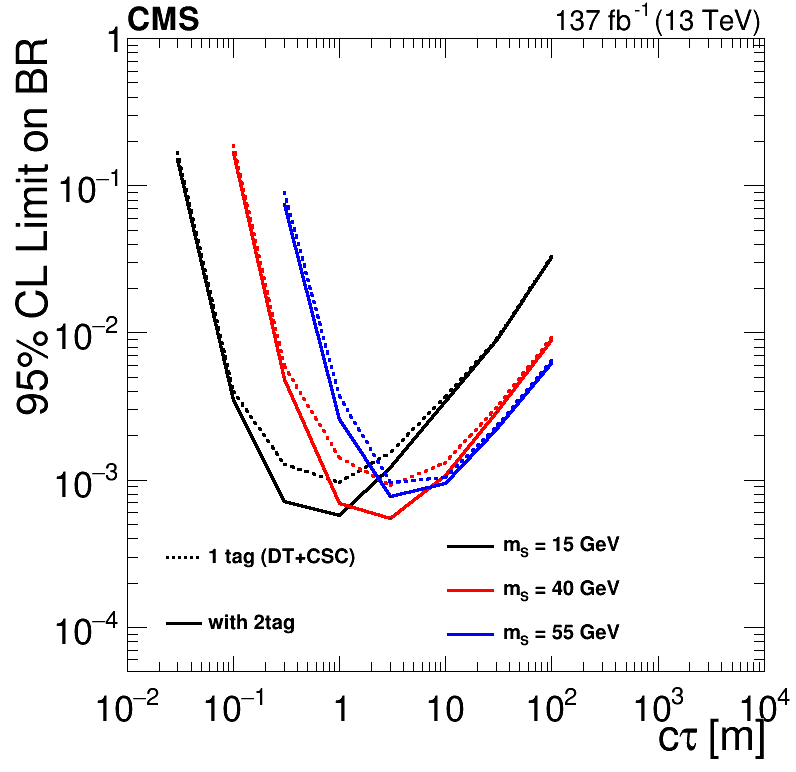

In [26]:
import os
opac_1sig = 0.25
opac_2sig = 0.1
withATLAS = 1

   


if decay == 'bbbb':
    leg = rt.TLegend(0.55,0.15,0.88,0.32)
    leg.SetTextSize(0.028)
    leg.SetBorderSize(0)
    leg.SetEntrySeparation(0.005)
else:
    leg = rt.TLegend(0.49,0.15,0.88,0.32)
    
    leg.SetTextSize(0.028)
    
    leg.SetBorderSize(0)
    leg.SetEntrySeparation(0.005)

leg2 = rt.TLegend(0.2,0.15,0.45,0.32)
leg2.SetTextSize(0.028)
leg2.SetBorderSize(0)
leg2.SetEntrySeparation(0.01)
c = rt.TCanvas('c','c', 800, 800)
c.SetRightMargin(0.04)


rt.gStyle.SetOptFit(1011)
ctaus_m = ctaus/1000
print(ctaus_m)
h = {}
h_others = {}
h_removeOverlap = {}

upper = 1000000


for i, m in enumerate(mass):
    cond = limits_removeOverlap[m][:,2] < 500
    h_removeOverlap[m] = create_TGraph(ctaus_m[cond], limits_removeOverlap[m][:,2][cond],  axis_title=['c#tau [m]', '95% CL Limit on BR'])
    h[m] = create_TGraph(ctaus_m[cond], limits[m][:,2][cond],  axis_title=['c#tau [m]', '95% CL Limit on BR'])
    print(m, ctaus_m, limits_removeOverlap[m][:,2][cond]/limits[m][:,2][cond])
    print(m, ctaus_m, limits_removeOverlap[m][:,2][cond])
#     print(m, ctaus_m, limits[m][:,2][cond])


    leg.AddEntry(h_removeOverlap[m], "m_{S} = "+str(m)+" GeV", "L")
    if i == 0:
        leg2.AddEntry(h[m], "1 tag (DT+CSC)", "LP")
        leg2.AddEntry(h_removeOverlap[m], "with 2tag", "L")
    
    h[m].SetLineWidth(3)
    h_removeOverlap[m].SetLineWidth(3)
    
    h[m].SetLineStyle(2)
    h_removeOverlap[m].SetLineColor(std_color_list[i])
    h[m].SetLineColor(std_color_list[i])
    h[m].GetXaxis().SetLimits(0.01,10000.0)
    h[m].GetYaxis().SetRangeUser(5e-5,1)
    h_removeOverlap[m].GetXaxis().SetLimits(0.01,10000.0)
    h_removeOverlap[m].GetYaxis().SetRangeUser(5e-5,1)




for i,m in enumerate(h.keys()):
    h[m].Draw('LA' if i == 0 else 'Lsame')
    h_removeOverlap[m].Draw('LPsame')

tdrstyle.setTDRStyle()
CMS_lumi.cmsText     = "CMS"
iPos = 0
CMS_lumi.writeExtraText =0
CMS_lumi.extraText   = "Preliminary"

if( iPos==0 ): CMS_lumi.relPosX = 0.12
# CMS_lumi.CMS_lumi(c, 4, 0)
CMS_lumi.CMS_lumi(c, 4, iPos)

leg.Draw()
leg2.Draw()
c.SetLogy()
c.SetLogx()
c.SetTicky(1)
c.SetTickx(1)
# output_dir = '/storage/user/christiw/gpu/christiw/llp/delayed_jet_analyzer/plots/MuonSystem_Analysis/limits/'+version+bdt_name+'/'+dc_version+'/'+unblind+'/'
# if not os.path.isdir(output_dir):os.makedirs(output_dir)
# name = output_dir+mode+'_HToSSTo'+decay+'_'+dphi+'_nRechit'+str(nrechit)+'_observed_withATLAS'
# if hybridNew:name += '_hybridNew'
# if CMS_lumi.writeExtraText: name += "_pas"



# c.SaveAs(name+'.png')
# c.SaveAs(name+'.C')
# c.SaveAs(name+'.pdf')

tdrstyle.setTDRStyle()
c.Draw()


# Observed Limit

[3.e-02 1.e-01 3.e-01 1.e+00 3.e+00 1.e+01 3.e+01 1.e+02]
137 fb^{-1} (13 TeV)


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


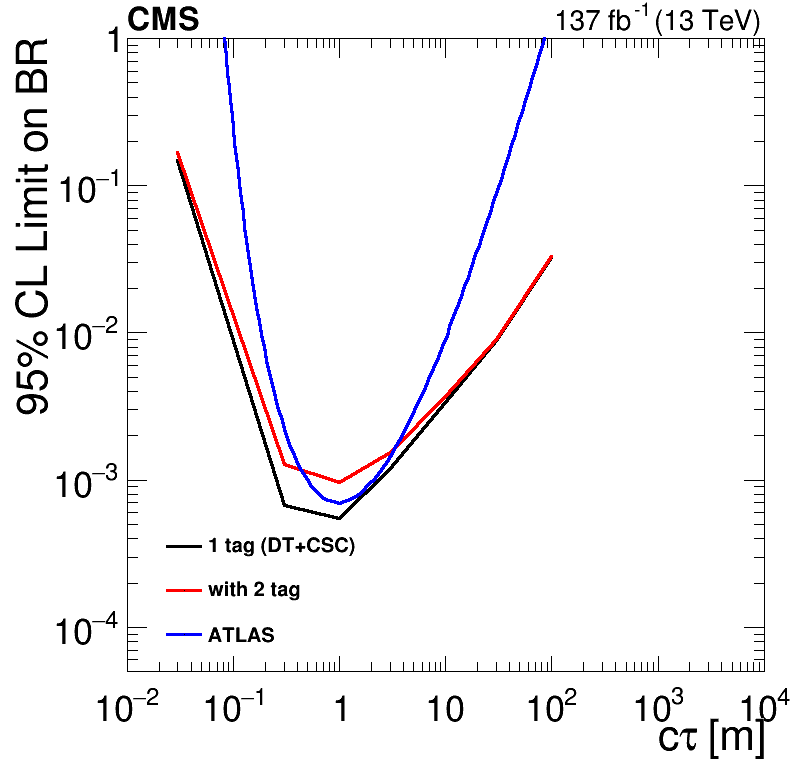

In [20]:
import os
opac_1sig = 0.25
opac_2sig = 0.1
withATLAS = 1

   


if decay == 'bbbb':
    leg = rt.TLegend(0.55,0.15,0.88,0.32)
    leg.SetTextSize(0.028)
    leg.SetBorderSize(0)
    leg.SetEntrySeparation(0.005)
else:
    leg = rt.TLegend(0.49,0.15,0.88,0.32)
    
    leg.SetTextSize(0.028)
    leg.SetBorderSize(0)
    leg.SetEntrySeparation(0.005)

leg2 = rt.TLegend(0.2,0.15,0.45,0.32)
leg2.SetTextSize(0.028)
leg2.SetBorderSize(0)
leg2.SetEntrySeparation(0.01)
c = rt.TCanvas('c','c', 800, 800)
c.SetRightMargin(0.04)


rt.gStyle.SetOptFit(1011)
ctaus_m = ctaus/1000
print(ctaus_m)
h = {}
h_others = {}
h_removeOverlap = {}

upper = 1000000

m = 15

cond = limits_removeOverlap[m][:,2] < 500
h['1tag'] = create_TGraph(ctaus_m[cond], limits_removeOverlap[m][:,2][cond],  axis_title=['c#tau [m]', '95% CL Limit on BR'])



h['2tag'] = create_TGraph(ctaus_m[cond], limits[m][:,2][cond],  axis_title=['c#tau [m]', '95% CL Limit on BR'])
h['atlas'] = create_TGraph(other_limits[str(m)][:,0],other_limits[str(m)][:,1],  axis_title=['c#tau [m]', '95% CL Limit on BR'])


    
h['1tag'].GetXaxis().SetLimits(0.01,10000.0)
h['1tag'].GetYaxis().SetRangeUser(5e-5,1)

for i,m in enumerate(h.keys()):
    if m == '1tag': leg2.AddEntry(h[m], '1 tag (DT+CSC)', "LP")
    elif m == '2tag': leg2.AddEntry(h[m], 'with 2 tag', "LP")
    else: leg2.AddEntry(h[m], 'ATLAS', "LP")
    h[m].SetLineColor(std_color_list[i])
    h[m].SetLineWidth(3)

    h[m].Draw('LA' if i == 0 else 'Lsame')


tdrstyle.setTDRStyle()
CMS_lumi.cmsText     = "CMS"
iPos = 0
CMS_lumi.writeExtraText =0
CMS_lumi.extraText   = "Preliminary"

if( iPos==0 ): CMS_lumi.relPosX = 0.12
# CMS_lumi.CMS_lumi(c, 4, 0)
CMS_lumi.CMS_lumi(c, 4, iPos)

leg.Draw()
leg2.Draw()
c.SetLogy()
c.SetLogx()
c.SetTicky(1)
c.SetTickx(1)
# output_dir = '/storage/user/christiw/gpu/christiw/llp/delayed_jet_analyzer/plots/MuonSystem_Analysis/limits/'+version+bdt_name+'/'+dc_version+'/'+unblind+'/'
# if not os.path.isdir(output_dir):os.makedirs(output_dir)
# name = output_dir+mode+'_HToSSTo'+decay+'_'+dphi+'_nRechit'+str(nrechit)+'_observed_withATLAS'
# if hybridNew:name += '_hybridNew'
# if CMS_lumi.writeExtraText: name += "_pas"



# c.SaveAs(name+'.png')
# c.SaveAs(name+'.C')
# c.SaveAs(name+'.pdf')

tdrstyle.setTDRStyle()
c.Draw()



# limit for different mass points

In [ ]:
import importlib
importlib.reload(sys.modules['histo_utilities'])
from histo_utilities import create_TH1D, create_TH2D, std_color_list, create_TGraph, make_ratio_plot



# Plotting ncsc
start_t = time.time()

rt.gStyle.SetOptFit(1011)
# for i,k in enumerate(tree_bkg.keys()):
br = 1
ctaus_m = ctaus/1000
print(ctaus_m)
# print(limits[:,2])
h_others = {}
h = {}
h_exp1sig = {}
h_exp2sig = {}
h_obs = {}
for m in mass:
#     if not m == 15:continue
    print(m)
    c = rt.TCanvas('c','c', 800, 800)
    leg = rt.TLegend(0.5,0.73,0.80,0.92)
    leg.SetTextSize(0.03)
    leg.SetBorderSize(0)
    leg.SetEntrySeparation(0.01)
    cond = limits[m][:,2] < 1
    h[m] = create_TGraph(ctaus_m[cond], limits[m][:,2][cond],  axis_title=['c#tau [m]', '95% CL Limit on BR'])
    if drawObs: h_obs[m] = create_TGraph(ctaus_m[cond], limits_obs[m][:,5][cond])


    h_exp1sig[m] = create_TGraph(np.hstack((ctaus_m[cond], np.flip(ctaus_m[cond]))), np.hstack((limits[m][:,1][cond], np.flip(limits[m][:,3][cond]))))
    h_exp2sig[m] = create_TGraph(np.hstack((ctaus_m[cond], np.flip(ctaus_m[cond]))), np.hstack((limits[m][:,0][cond], np.flip(limits[m][:,4][cond]))))
#
    leg.AddEntry(h[m], "Expected  95% CL upper limit", "L")
    leg.AddEntry(h_obs[m], "Observed", "PL")
    leg.AddEntry(h_exp1sig[m], "#pm 1 #sigma Expected", 'F')
    leg.AddEntry(h_exp2sig[m], "#pm 2 #sigma Expected", 'F')
    h[m].SetLineColor(std_color_list[2])
    h[m].SetLineWidth(2)
    h[m].SetLineStyle(4)


    
    h_obs[m].SetMarkerStyle(8)
    h_obs[m].SetMarkerSize(1)
    h_obs[m].SetLineColor(1)
    h_obs[m].SetLineWidth(2)
    h_exp1sig[m].SetFillColor(417)
    h_exp2sig[m].SetFillColor(800)
    h[m].GetXaxis().SetLimits(0.01,1000.0)
    h[m].GetYaxis().SetRangeUser(1e-5,100)
    h[m].GetXaxis().SetTitleOffset(1)

    h[m].Draw('LA')
    h_exp2sig[m].Draw( 'Fsame')
    h_exp1sig[m].Draw('Fsame')
    h[m].Draw('Lsame')
    h_obs[m].Draw('PLsame')

    tdrstyle.setTDRStyle()
    CMS_lumi.cmsText     = "CMS"
    iPos = 0
    CMS_lumi.writeExtraText = True
    CMS_lumi.extraText   = "Preliminary"
    iPos = 0
    if( iPos==0 ): CMS_lumi.relPosX = 0.12
    CMS_lumi.CMS_lumi(c, 4, 0)
    leg.Draw()
    c.SetRightMargin(0.03)
    c.SetLogy()
    c.SetLogx()
    c.SetTicky(1)
    c.SetTickx(1)
    c.Draw()
    output_dir = '/storage/user/christiw/gpu/christiw/llp/delayed_jet_analyzer/plots/MuonSystem_Analysis/limits/'+version+bdt_name+'/'+dc_version+'/unblind/'
    if not os.path.isdir(output_dir):os.makedirs(output_dir)
    if VBFH:
        c.SaveAs(output_dir+'/vbfh_'+decay+'_mx'+str(m)+dphi+'_nRechit'+str(nrechit)+'.png')
        c.SaveAs(output_dir+'/vbfh_'+decay+'_mx'+str(m)+dphi+'_nRechit'+str(nrechit)+'.C')
    else:
        c.SaveAs(output_dir+'/ggh_'+decay+'_mx'+str(m)+dphi+'_nRechit'+str(nrechit)+'.png')
        c.SaveAs(output_dir+'/ggh_'+decay+'_mx'+str(m)+dphi+'_nRechit'+str(nrechit)+'.C')

# limit for different nrechits

##### load ntuples

In [ ]:
limitTrees =OrderedDict()
dataCards = OrderedDict()
version = '/V1p17/v1/v66/'
bdt_name = 'cut_based_v4'
dc_version = 'v7'
methodA = True
dphi = 'dPhiCluster0p75'
# dphi = 'dPhiJet0p6'
nRechit = 'nRechit130'
# NEW_CTAU = 60 #cm
limitDir0 = '/storage/user/christiw/login-1/christiw/LLP/CMSSW_10_2_13/src/HiggsAnalysis/MuonSystemLimit/combine/limitTrees/'+version+'/'+bdt_name+'/'+dc_version+'/'
dataCardDir0 = '/storage/user/christiw/login-1/christiw/LLP/CMSSW_10_2_13/src/HiggsAnalysis/MuonSystemLimit/combine/datacards/'+version+'/'+bdt_name+'/'+dc_version+'/'
method = 1
fit_function = 'methodB/blind/'
nRechits = np.arange(60,220,10)
nRechits = np.arange(60,180,10)
nRechits = [60,70,80,90,100,120,130,135,140,145,150,155,160,170]

# dphis = np.arange(55,100,5)/100
# ctaus = np.array([5, 10, 30, 40, 50, 100, 200, 300, 500, 1000, 5000, 10000, 20000, 50000, 100000])
ctaus = np.array([1000])
masses = np.array([15, 40, 55])
ct = 1000
var = nRechits


limits = np.ones((len(masses),len(nRechits), 6))



limitDir = limitDir0 +fit_function+'/'
dataCardDir = dataCardDir0 + fit_function+'/'
for i, m in enumerate(masses):
    for j,nRechit in enumerate(var):
        limitTrees[str(nRechit)] = limitDir + 'higgsCombine.ggh_HToSSTobbbb_mh125_mx'+str(m)+'_ctau'+str(ct)+'mm_nRechit'+ str(nRechit)+ dphi+'.AsymptoticLimits.mH120.root'
        dataCards[str(nRechit)] = dataCardDir + 'ggh_HToSSTobbbb_mh125_mx'+str(m)+'_ctau'+str(ct)+'mm_nRechit'+ str(nRechit)+ dphi+'.txt'

    for j,k in enumerate(limitTrees.keys()):
        root_dir = uproot.open(limitTrees[k]) 
        T = root_dir['limit']
        text_file = open(dataCards[k], "r")
        line = text_file.readline()
        signal_norm = float(line.split(" ")[3])
        limits[i,j] = np.array(T.array('limit'))/signal_norm
  
    print(nRechits)


#### plot limit vs. nrechit

In [ ]:
import importlib
importlib.reload(sys.modules['histo_utilities'])
from histo_utilities import create_TH1D, create_TH2D, std_color_list, create_TGraph, make_ratio_plot
leg = rt.TLegend(0.25,0.75,0.55,0.90)
leg.SetTextSize(0.03)
leg.SetBorderSize(0)
leg.SetEntrySeparation(0.01)



c = rt.TCanvas('c','c', 900, 800)
# Plotting ncsc
start_t = time.time()

rt.gStyle.SetOptFit(1011)
h = {}
h_exp2sig = {}
h_exp1sig = {}

# for i, m in enumerate(masses):
legend = {}
legend[0] = 'scaled from intime low BDT, ABCD method'
legend[1] = 'scaled from OOT high BDT, ABCD method'
legend[2] = 'scaled from OOT high BDT, single expo'
legend[3] = 'scaled from OOT high BDT, modified expo'
legend[4] = 'scaled from OOT high BDT, single power law'





for i, m in enumerate(masses):
    
   
    h[m] = create_TGraph(var, limits[i,:,2],  axis_title=['N_{rechits} cut', '95% CL Limit on BR'])
    h_exp1sig[m] = create_TGraph(np.hstack((var, np.flip(var))), np.hstack((limits[i,:,1], np.flip(limits[i,:,3]))))
    h_exp2sig[m] = create_TGraph(np.hstack((var, np.flip(var))), np.hstack((limits[i,:,0], np.flip(limits[i,:,4]))))

    leg.AddEntry(h[m], "m_{x} = "+str(m)+" GeV, c#tau = "+str(int(ct/1000))+" m", "L")


#     leg.AddEntry(h_exp1sig, "#pm 1 #sigma Expected", 'F')
#     leg.AddEntry(h_exp2sig, "#pm 2 #sigma Expected", 'F')

#     h_exp1sig.SetFillColor(std_color_list[3])
#     h_exp2sig.SetFillColor(5)
    h[m].SetLineColor(std_color_list[i])
    h[m].SetLineWidth(2)
    h_exp1sig[m].SetFillColor(417)
    h_exp2sig[m].SetFillColor(800)
  
    
    h[m].Draw('ac' if i == 0 else 'c')
#     if m == 55:
#         h_exp2sig[m].Draw( 'Fsame')
#         h_exp1sig[m].Draw('Fsame')
    h[m].Draw('LSame')


# #     h[m].GetXaxis().SetLimits(0.5,1)
    h[m].GetXaxis().SetLimits(50,200)
    h[m].GetYaxis().SetRangeUser(1e-4,1)
#     h[m].GetXaxis().SetTitleOffset(1)

#     h_exp2sig.Draw('Fsame')
#     h_exp1sig.Draw('Fsame')
#     h.Draw('Lsame')

#     result = nRechits[np.where(limits[i,:,2] == np.amin(limits[i,:,2]))]
#     print("nRechits cut with minimum limit: ", result)




leg.Draw()
c.SetRightMargin(0.1)
c.SetLogy()
# c.SetLogx()

c.Draw()
output_dir = '/storage/user/christiw/gpu/christiw/llp/delayed_jet_analyzer/plots/MuonSystem_Analysis/limits/'+version+bdt_name+'/'+dc_version+'/'
c.SaveAs(output_dir+'/ggh_bbbb_scanNrechits.png')
# print(time.time()-start_t)

# limit wrt Nrechits for different methods

In [ ]:
limitTrees =OrderedDict()
dataCards = OrderedDict()
version = '/V1p17/v1/v2/'
bdt_name = 'bdt_flatten_metfilter_me1112nohits_eta2p0_testsize0p2_noSpread_v2'
methodA = True
dphi = 'dPhiCluster0p75'
nRechit = 'nRechit100'
# NEW_CTAU = 60 #cm
limitDir = '/storage/user/christiw/login-1/christiw/LLP/CMSSW_10_2_13/src/HiggsAnalysis/MuonSystemLimit/combine/limitTrees/'+version+'/'+bdt_name+'/'
dataCardDir = '/storage/user/christiw/login-1/christiw/LLP/CMSSW_10_2_13/src/HiggsAnalysis/MuonSystemLimit/combine/datacards/'+version+'/'+bdt_name+'/'
method = 1
fit_function = 'se'
if method == 0:
    limitDir+='methodA/'
    dataCardDir+='methodA/'
elif method == 1:
    limitDir+='methodB/'
    dataCardDir+='methodB/'
else:
    limitDir+='methodC_'+fit_function+'/'
    dataCardDir+='methodC_'+fit_function+'/'
nRechits = np.arange(60,220,10)
# dphis = np.arange(55,100,5)/100
# ctaus = np.array([5, 10, 30, 40, 50, 100, 200, 300, 500, 1000, 5000, 10000, 20000, 50000, 100000])
ctaus = np.array([1000])
masses = np.array([15, 40, 55])
ct = 1000
m = 40
var = nRechits
# limits = np.ones((len(masses),len(var), 6))
limits = np.ones((len(masses),len(nRechits), 6))


for i, m in enumerate(masses):


    for j,nRechit in enumerate(nRechits):
        limitTrees[str(nRechit)] = limitDir + 'higgsCombine.ggh_HToSSTobbbb_mh125_mx'+str(m)+'_ctau'+str(ct)+'mm_nRechit'+ str(nRechit)+ 'dPhiCluster0p75.AsymptoticLimits.mH120.root'
        dataCards[str(nRechit)] = dataCardDir + 'ggh_HToSSTobbbb_mh125_mx'+str(m)+'_ctau'+str(ct)+'mm_nRechit'+ str(nRechit)+ 'dPhiCluster0p75.txt'
#     for j,k in enumerate(dphis):
#         dphi = str(k).replace('.','p')
#         limitTrees[k] = limitDir + 'higgsCombine.ggh_HToSSTobbbb_mh125_mx'+str(m)+'_ctau'+str(ct)+'mm_'+nRechit+'dPhiCluster'+str(dphi)+'.AsymptoticLimits.mH120.root'
#         dataCards[k] = dataCardDir + 'ggh_HToSSTobbbb_mh125_mx'+str(m)+'_ctau'+str(ct)+'mm_'+nRechit+'dPhiCluster'+str(dphi)+'.txt'


        
    for j,k in enumerate(limitTrees.keys()):
        root_dir = uproot.open(limitTrees[k]) 
        T = root_dir['limit']
        text_file = open(dataCards[k], "r")
        line = text_file.readline()
        signal_norm = float(line.split(" ")[3])
        limits[i,j] = np.array(T.array('limit'))/signal_norm
#         print(m,k,limits[i,j,2])
#         print(i,j, limits[i,j])
#         if i == 0: limits[i] = np.array(T.array('limit'))/signal_norm
#         else: limits[i] = np.vstack((limits[i], T.array('limit')/signal_norm))
    #     print("signal_norm",signal_norm)
#     limits = np.array(limits)
#     print(str([round(i, 5) for i in limits[:,2]])[1:-1])
    
#     result = nRechits[np.where(limits[:,2] == np.amin(limits[:,2]))]
#     print(NEW_CTAU, "nRechits cut with minimum limit: ", result)
#[0.00941727 0.00232179 0.00032019 0.0002337  0.00017991 0.00017472]
# print(limits.shape)
print(nRechits)
for i in limits[:,:,2]:
    print(str([round(j,5) for j in i])[1:-1])


